# Cartes de gain du MCP
Th class MCP_offset_map is usefull when one requires to build MCP offset maps. It works as follows :
* the only argument you give to this class is the path (unix string like object) to the folder in which you want to store the data or in which the data already exist. Note that it seems not possible to creat database on the server hence this path should be on you computer.
* If it is empty, it will creat a empty SQLite database. First thing you have to do is to add sequences to this database. To do so, use the instruction `add_sequence_to_database('Path/To/your/sequences')`. In this case, the programm tries to get the reference of this sequence (of the form yyy/mm/dd/seq) and search into its first database (whos name is sequences) if this sequences was already add to the database or not. If not, it adds it (the 'atoms' table), looping over all cycles of the sequence. Such an operation takes a few minutes for really large sequences.
* What we add to the atom database are the following elements : 
    + deltaX : position on X of the atom,
    + deltaY : position on Y of the atom,
    + offset : offset of the atom, X2+X1-Y2-Y2
* Once you've built the database, you can compute the statistical properties of your MCP. To do so, you just have to call `update_result()` : this function will loop over all X pixels of the MCP and load atoms that where found at this X position : we calculate the number of count, the mean offset, std, min and max at each Y position and store it into a dataframe named 'result'. This dataframe (size : 1500x1500x25) is then store into a pkl file whose name is result.pkl. Note that this step is quite long (an hour typically). 
Note also that if your compute have huge memmory, you might be able to load all the atom database in one shot using :  
```
    mcp_map = MCP_offset_map("your/folder/database")
    mcp_map.connect_to_database()
    all_atoms = pd.read_sql_query("SELECT * FROM atoms", mcp_map.connexion) 
```
➡️ All units are in coding time of the MCP.  
➡️ Offset definition is $S \equiv X_1 + X_2 - Y1 - Y2$ 

In [1]:
from heliumtools.mcp_offset_map import MCP_offset_map
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
mcp_map = MCP_offset_map("/home/victor/mcpmaps/")


In [3]:
# mcp_map.add_sequence_to_database("/home/victor/gus_data/2022/07/00/010") # --> FAKE SEQUENCE !!!!!
mcp_map.add_sequence_to_database("/home/victor/gus_data/2022/07/15/007")
mcp_map.add_sequence_to_database("/home/victor/gus_data/2022/07/15/029")
mcp_map.add_sequence_to_database("/home/victor/gus_data/2022/07/18/004")
mcp_map.add_sequence_to_database("/home/victor/gus_data/2022/07/18/005")
mcp_map.add_sequence_to_database("/home/victor/gus_data/2022/07/19/004")
mcp_map.add_sequence_to_database("/home/victor/gus_data/2022/07/19/005")
mcp_map.add_sequence_to_database("/home/victor/gus_data/2022/07/19/007")
mcp_map.add_sequence_to_database("/home/victor/gus_data/2022/07/19/008")
mcp_map.add_sequence_to_database("/home/victor/gus_data/2022/07/19/014") 

Sequence 2022/07/15/007 was already in the database !!!
Sequence 2022/07/15/029 was already in the database !!!
Sequence 2022/07/18/004 was already in the database !!!
Sequence 2022/07/18/005 was already in the database !!!
Sequence 2022/07/19/004 was already in the database !!!
Sequence 2022/07/19/005 was already in the database !!!
Sequence 2022/07/19/007 was already in the database !!!
Sequence 2022/07/19/008 was already in the database !!!
Sequence 2022/07/19/014 was already in the database !!!


In [5]:
mcp_map.check_your_computer_ability(size=30)
mcp_map.set_computer_ability(size = 30)
# mcp_map.update_result()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881852 entries, 0 to 881851
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   deltaX  881852 non-null  int64
 1   deltaY  881852 non-null  int64
 2   offset  881852 non-null  int64
dtypes: int64(3)
memory usage: 20.2 MB
None
 ==> Request took 23.70840811729431 s with a computer_ability = 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4656155 entries, 0 to 4656154
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   deltaX  int64
 1   deltaY  int64
 2   offset  int64
dtypes: int64(3)
memory usage: 106.6 MB
None
 ==> Request took 30.839086771011353 s with a computer_ability = 30


## Contenance du dataframe result
Bravo ! Vous venez de générer le dataframe result qui contient tous les données intéressants pour analyser notre MCP. Arrêtons-nous maintenant quelques instants sur ses lignes et colonnes.

Une ligne correspond à un pixel du MCP, localisé par sa position deltaX et deltaY.

Pour chaque pixel, nous avons ensuite :
* `counts` le nombre de coups aka le nombre d'atome total détecté.
* `mean` la moyenne des offsets,
* `std` la déviation standards sur la série des offsets
* `max` le maximum de chaque offset mesuré,
* `min` bon ok vous avez deviné,
* `quantile 5`, `quantile 95`, `quantile 25`, `quantile 75`, la valeur d'offset en dessous de laquelle il y a 5% des valeurs (respectivement 95%, 25% et 75%)
* `mean (90)` & `std (90)` la moyenne et la déviation standard pour la série des offset entre le 1er décile et le 9ème décile
* `mean (50)` & `std (50)` la moyenne et la déviation standard pour la série des offsets des deux quartiles centraux.
* `mean (+/-10)`, `counts (+/-10)` & `std (+/-10)` qui sont la moyenne, le nombre de coup et la std des séries des offsets dont les valeurs sont entre mediane(offsets)+\-10 unités de temps.
* `mean (+/-10)`, `counts (+/-10)` & `std (+/-10)` idem que ci-dessus avec 5 unités de temps.

In [3]:
mcp_map.result

,deltaX,deltaY,mean,std,counts,max,min,median,quantile 5,quantile 95,...,counts (90),mean (50),std (50),counts (50),mean (+/-10),std (+/-10),counts (+/-10),mean (+/-5),std (+/-5),counts (+/-5)
0,-707,-36,151.0,0.000000,1,151,151,151.0,151.0,151.0,...,1.0,151.0,0.0,1.0,151.0,0.0,1.0,151.0,0.0,1.0
1,-707,-35,-82.0,25.455844,2,-64,-100,-82.0,-98.2,-65.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-707,-33,-60.0,0.000000,1,-60,-60,-60.0,-60.0,-60.0,...,1.0,-60.0,0.0,1.0,-60.0,0.0,1.0,-60.0,0.0,1.0
3,-707,-32,-22.0,171.119841,2,99,-143,-22.0,-130.9,86.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-707,-30,31.0,0.000000,1,31,31,31.0,31.0,31.0,...,1.0,31.0,0.0,1.0,31.0,0.0,1.0,31.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,705,34,-87.0,0.000000,1,-87,-87,-87.0,-87.0,-87.0,...,1.0,-87.0,0.0,1.0,-87.0,0.0,1.0,-87.0,0.0,1.0
14,705,48,-147.0,0.000000,1,-147,-147,-147.0,-147.0,-147.0,...,1.0,-147.0,0.0,1.0,-147.0,0.0,1.0,-147.0,0.0,1.0
15,706,-14,-136.0,0.000000,1,-136,-136,-136.0,-136.0,-136.0,...,1.0,-136.0,0.0,1.0,-136.0,0.0,1.0,-136.0,0.0,1.0
16,706,18,-84.0,0.000000,1,-84,-84,-84.0,-84.0,-84.0,...,1.0,-84.0,0.0,1.0,-84.0,0.0,1.0,-84.0,0.0,1.0


## Visualisation des cartes du MCP

La classe possède quelques méthodes naïves pour regarder les cartes d'offset mail il sera sûreme plus simple de les écrire soit même. À chaque fois, tout argument supplémentaire (**kwargs) est passé en argument de la heatmap. 
* `show_map(column, **kwarg)` prend en argument une colonne du dataframe result. Tout autre argument est passé à l'objet heatmap de seaborn. Pour visualiser une carte 
  * de gain : `column = counts`
  * d'offset : `column = mean`
  * de résolution `column = std`  
etc...
* `show_three_maps(serie_type, **kwargs)` qui montre carte de gain, d'offset et de résolution. L'argument serie_type est par défaut "" soit la carte avec tous les atomes mais peut être différent. Il doit être parmis : ["", " (+/-10)", " (+/-5)", " (90)", " (50)"]. Tout argument donné est passé à seaborn.heatmap des 3 cartes.--> Les maps visualisés ne sont pas top car le range est automatique.
* `show_maps_containing_word(word, **kwargs)` toutes les cartesdont la colonne possède le mot "word". Par exemple, la commande `show_maps_containing_word(word="mean")` trace les cartes d'offset de toutes les séries afin de les comparer.   
Note: je conseille de mettre des bornes de l'ordre de 
  * `vmin = 0, vmax = 60` pour word = "mean" (cartes d'offset)
  * `vmin = 0, vmax = 5` (environ) pour word = "std" soit les cartes de résolution,
* `show_counts_map(**kwargs)` montre la carte de gain ainsi que le nombre de coups en proportion par rapport à cette carte de gain pour chaque autre série.
* `show_offset_distribution(points, **kwargs)` montre la distribution des offsets des points donnés. `points` est donc une liste de tuples (deltaX, deltaY).    
⚠️ cette commande prend du temps (quelques minutes) car elle va interroger la base de données autnat de fois qu'il y a de points.  Il faut donc avoir une base de donnée complète pour l'utiliser. 
Ex : `points = [(300, 300), (-150, 150)]`  


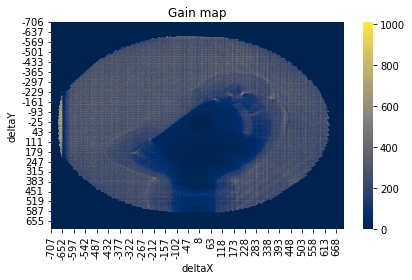

In [4]:
mcp_map.show_map("counts", cmap="cividis")

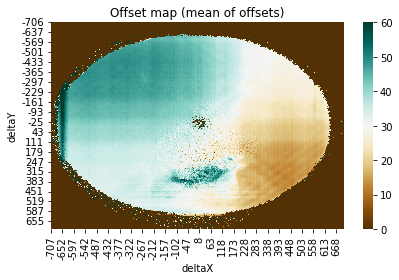

In [8]:
mcp_map.show_map("mean", cmap="BrBG", vmin = 0, vmax = 60)

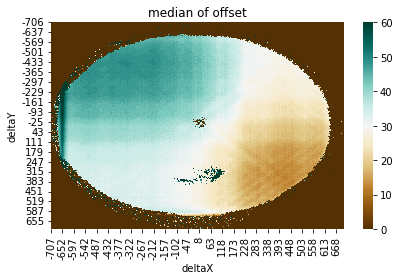

In [9]:
mcp_map.show_map("median", cmap="BrBG", vmin = 0, vmax = 60)


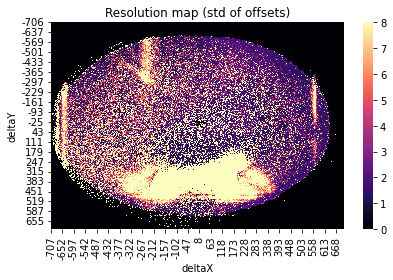

In [10]:
mcp_map.show_map("std", cmap="magma", vmin = 0, vmax = 8)

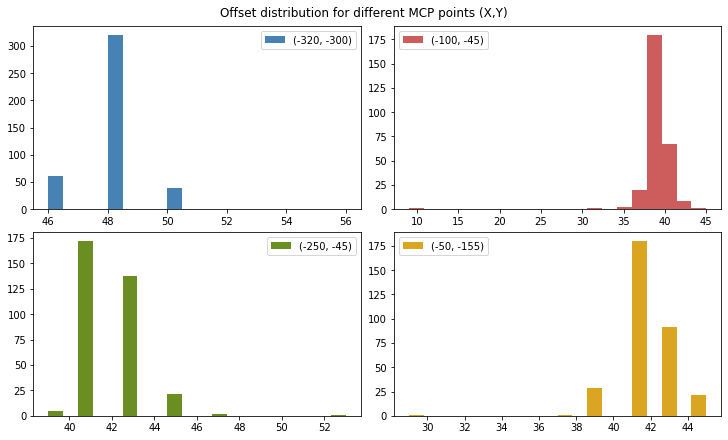

In [11]:
## Attention : pour utiliser cette fonction, il faut avoir la base de données !!!
mcp_map.show_offset_distribution(points=[(-320, -300), (-100, -45), (-250, -45), (-50, -155)])

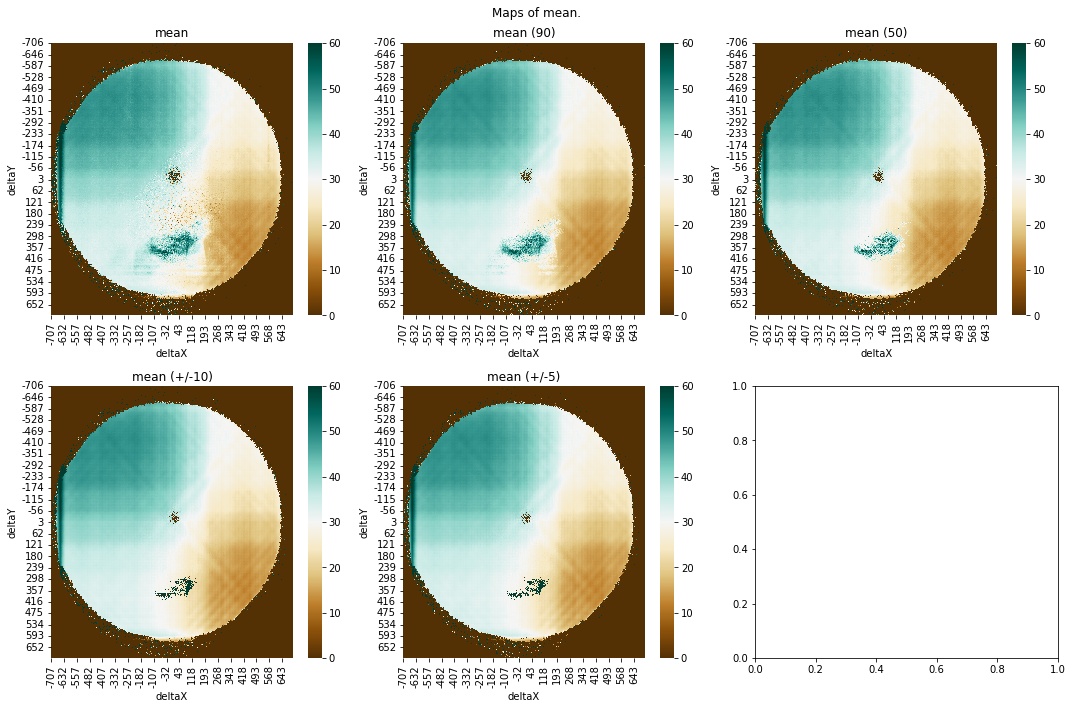

In [12]:
mcp_map.show_maps_containing_word("mean", vmin = 0, vmax = 60,  cmap="BrBG")

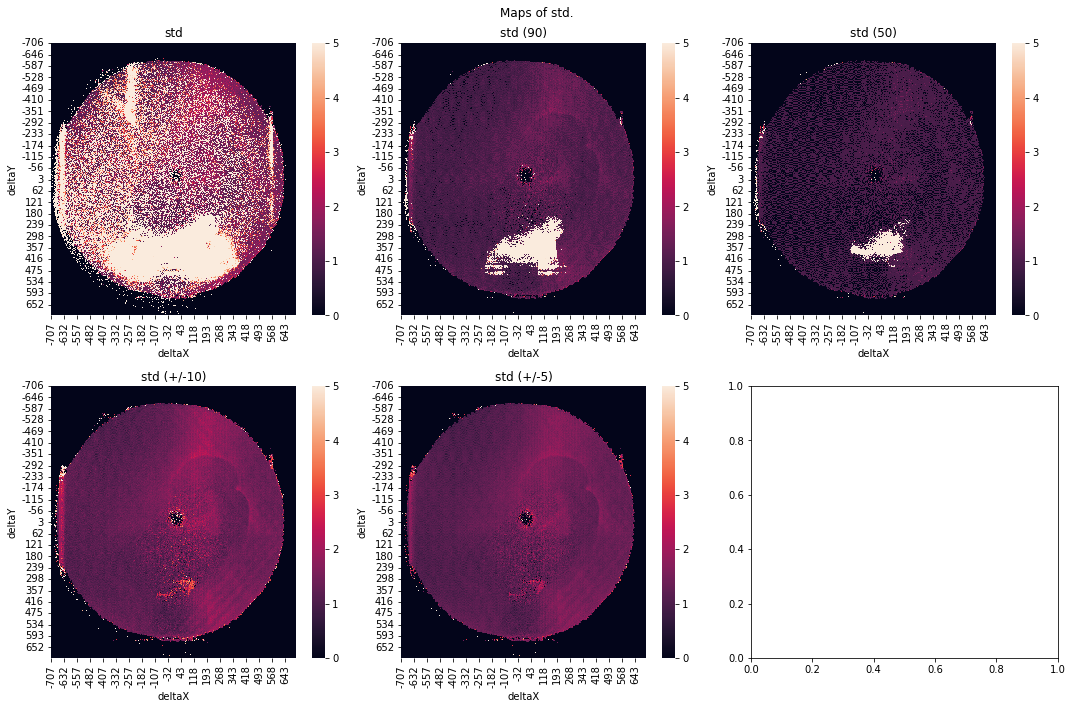

In [10]:
mcp_map.show_maps_containing_word("std", vmin = 0, vmax = 5)

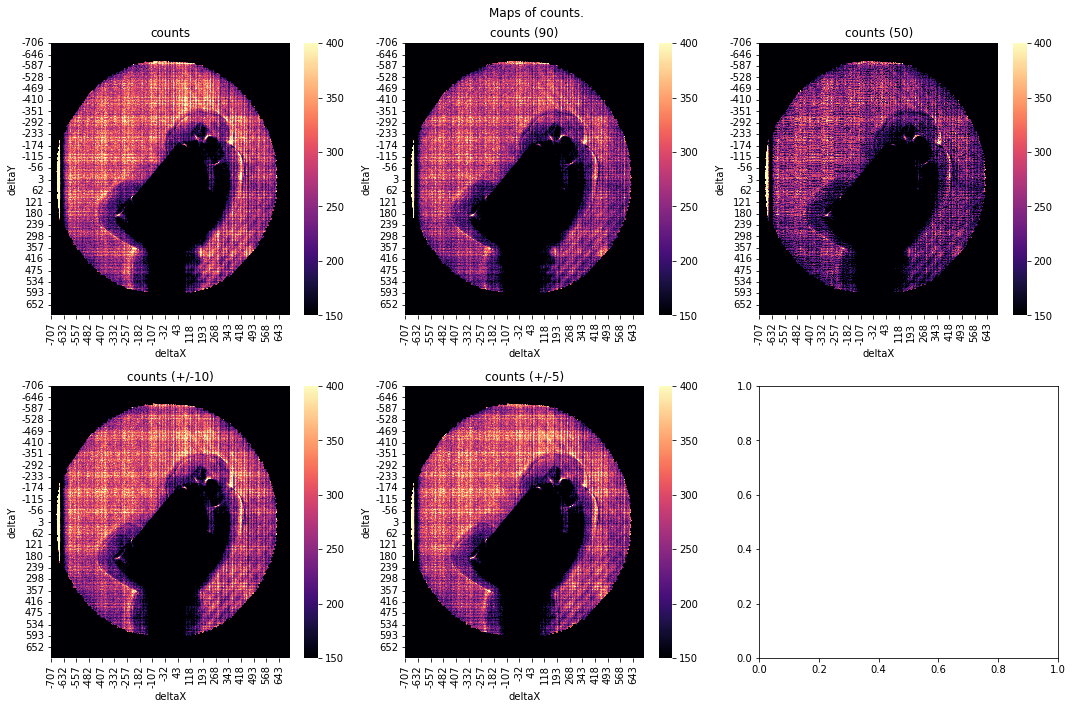

In [9]:
mcp_map.show_maps_containing_word("counts", vmin = 150, vmax = 400, cmap="cividis")

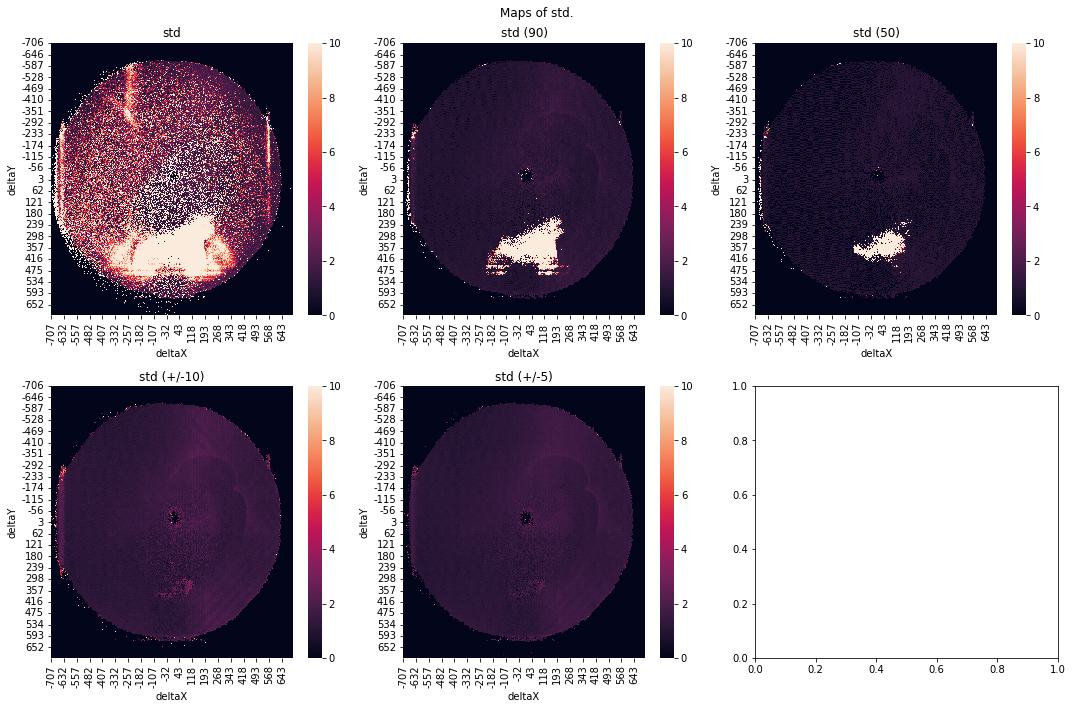

In [6]:
mcp_map.show_maps_containing_word("std", vmin = 0, vmax = 10)

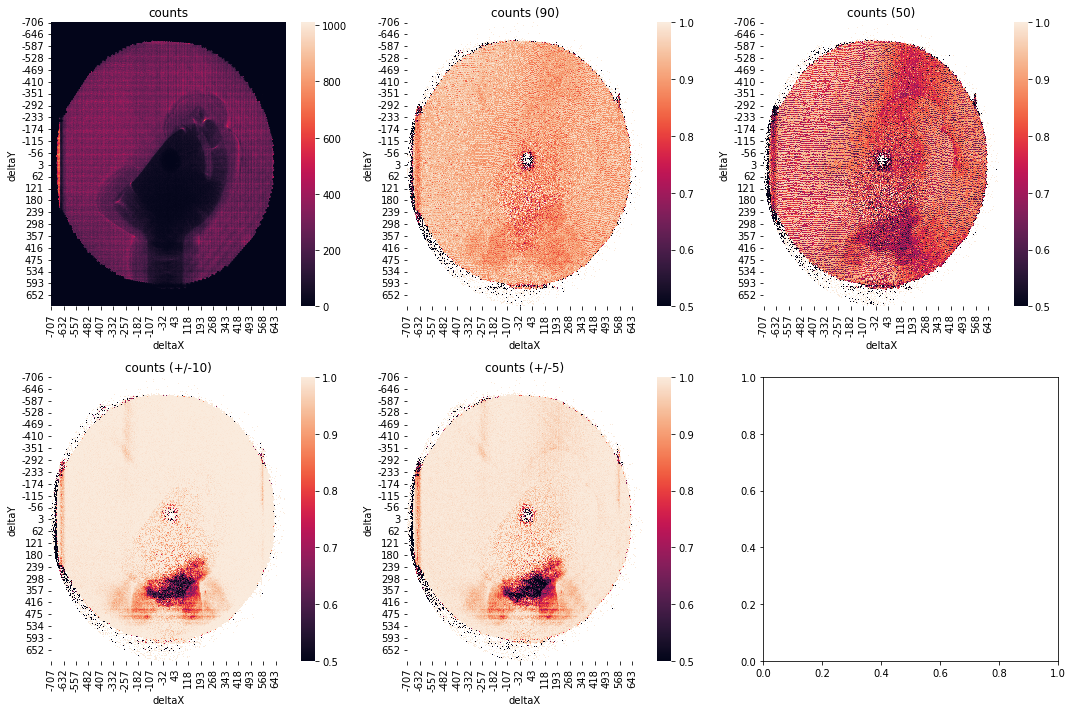

In [4]:
# Dans cette map, on montre la carte de gain avec tous les atomes puis le ration du nombre d'atome par pixels dans les séries (+/-10), (90) etc...
mcp_map.show_counts_map(vmin = 0.5, vmax = 1)

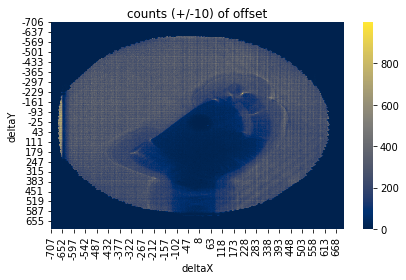

In [12]:
mcp_map.show_map("counts (+/-10)", cmap="cividis")

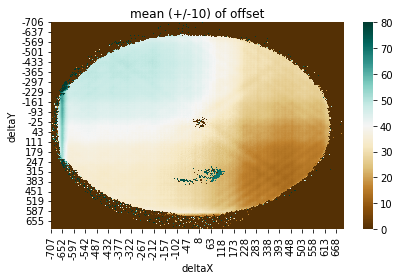

In [17]:
mcp_map.show_map("mean (+/-10)", cmap="BrBG", vmin = 0, vmax = 80)

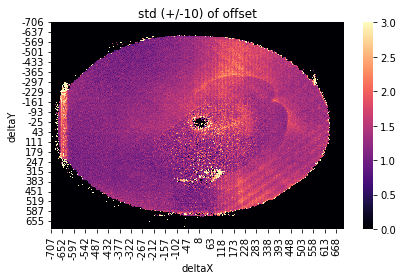

In [16]:
mcp_map.show_map("std (+/-10)", cmap="magma", vmin = 0, vmax = 3)